In [5]:
import numpy as np 
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

data_2021 = pd.read_csv('../DATASET/2021/Hasil_2021.csv')
data_2022 = pd.read_csv('../DATASET/2022/Hasil_2022.csv')
data_2023 = pd.read_csv('../DATASET/2023/Hasil_2023.csv')
data_JP = pd.read_csv('../DATASET/Jumlah penduduk/Hasil_JP.csv')
data_KP = pd.read_csv('../DATASET/Kapasitas Pembangkit/Hasil_KP.csv')

data_JP = data_JP.rename(columns={ 
    'Tahun_2021': 'JP_2021',
    'Tahun_2022': 'JP_2022',
    'Tahun_2023': 'JP_2023'
})

data_KP = data_KP.rename(columns={
    'Tahun_2021': 'KP_2021',
    'Tahun_2022': 'KP_2022',
    'Tahun_2023': 'KP_2023'
})

data_listrik = pd.merge(data_2021[['Province', 'Residential', 'Industrial', 'Business', 'Social', 'Gov_Office', 'Pub_Street', 'Total']],
                        data_2022[['Province', 'Residential', 'Industrial', 'Business', 'Social', 'Gov_Office', 'Pub_Street', 'Total']], 
                        on='Province', suffixes=('_2021', '_2022'))

data_listrik = pd.merge(data_listrik, data_2023[['Province', 'Residential', 'Industrial', 'Business', 'Social', 'Gov_Office', 'Pub_Street', 'Total']], 
                        on='Province', suffixes=('_2022', '_2023'))

combined_JP = pd.merge(data_listrik, data_JP[['Province', 'JP_2021', 'JP_2022', 'JP_2023']], on='Province', how='left')
final = pd.merge(combined_JP, data_KP[['Province', 'KP_2021', 'KP_2022', 'KP_2023']], on='Province', how='left')
final.to_csv('Hasil_Gabungan.csv', index=False)

In [13]:
columns_2021 = ['Residential_2021', 'Business_2021', 'Industrial_2021', 'Social_2021', 'Gov_Office_2021', 'Pub_Street_2021', 'Total_2021', 'JP_2021', 'KP_2021']
columns_2022 = ['Residential_2022', 'Business_2022', 'Industrial_2022', 'Social_2022', 'Gov_Office_2022', 'Pub_Street_2022', 'Total_2022','JP_2022', 'KP_2022' ]
columns_2023 = ['Residential', 'Business', 'Industrial', 'Social', 'Gov_Office', 'Pub_Street', 'Total',  'JP_2023', 'KP_2023']
columnss = ['Residential_2021', 'Business_2021', 'Industrial_2021', 'Social_2021', 'Gov_Office_2021', 'Pub_Street_2021', 'Total_2021', 'JP_2021', 'KP_2021'
            ,'Residential_2022', 'Business_2022', 'Industrial_2022', 'Social_2022', 'Gov_Office_2022', 'Pub_Street_2022', 'Total_2022','JP_2022', 'KP_2022'
            ,'Residential', 'Business', 'Industrial', 'Social', 'Gov_Office', 'Pub_Street', 'Total',  'JP_2023', 'KP_2023'
            ]

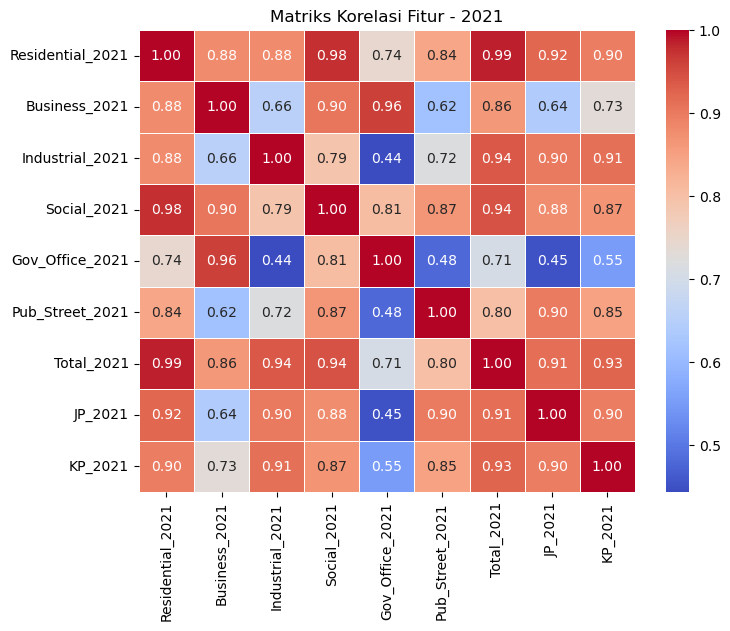

In [15]:
data_T2021 = final[columns_2021]
correlation_2021 = data_T2021.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_2021, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Fitur - 2021')
plt.show()

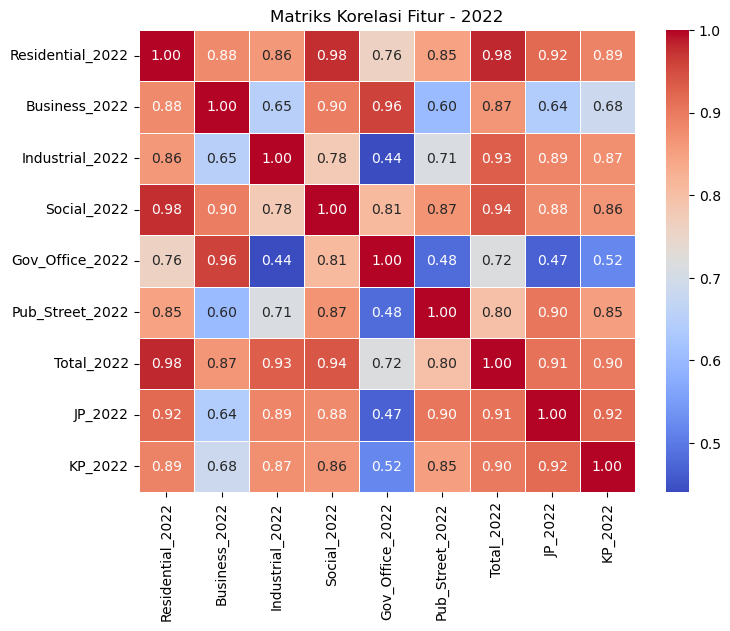

In [16]:
data_T2022 = final[columns_2022]
correlation_2022 = data_T2022.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_2022, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Fitur - 2022')
plt.show()

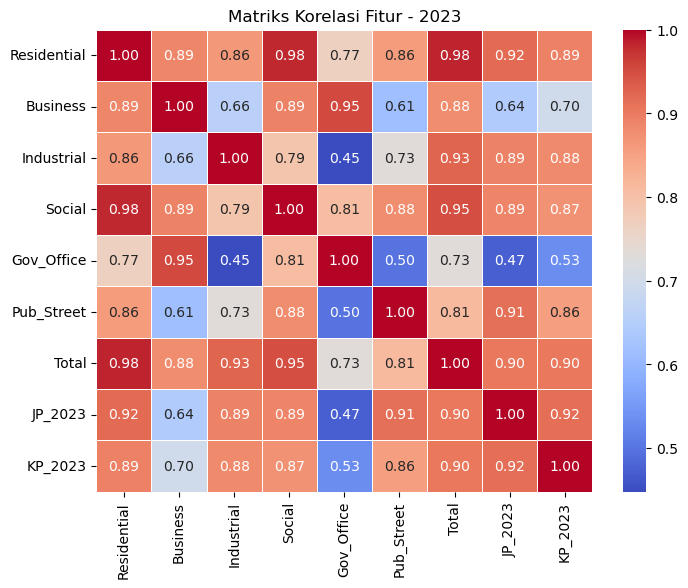

In [11]:
data_T2023 = final[columns_2023]
correlation_2023 = data_T2023.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_2023, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Fitur - 2023')
plt.show()